# Planewaves in Homogeneous Media

The eigenmode source can also be used to launch [planewaves](https://en.wikipedia.org/wiki/Plane_wave) in homogeneous media. The dispersion relation for a planewave is ω=|$\vec{k}$|/$n$ where ω is the angular frequency of the planewave and $\vec{k}$ its wavevector; $n$ is the refractive index of the homogeneous medium. This example demonstrates launching planewaves in a uniform medium with $n$ of 1.5 at three rotation angles: 0°, 20°, and 40°. Bloch-periodic boundaries via the `k_point` are used and specified by the wavevector $\vec{k}$. PML boundaries are used only along the x-direction.

First, we'll load our necesarry modules:

In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

Next, we'll create a function we can call multiple times that runs the simulation for different rotation angles:

In [2]:
def run_sim(rot_angle=0):

    resolution = 50  # pixels/μm

    cell_size = mp.Vector3(14, 10, 0)

    pml_layers = [mp.PML(thickness=2, direction=mp.X)]

    fsrc = 1.0  # frequency of planewave (wavelength = 1/fsrc)

    n = 1.5  # refractive index of homogeneous material
    default_material = mp.Medium(index=n)

    k_point = mp.Vector3(fsrc * n).rotate(mp.Vector3(z=1), rot_angle)

    sources = [
        mp.EigenModeSource(
            src=mp.ContinuousSource(fsrc),
            center=mp.Vector3(),
            size=mp.Vector3(y=10),
            direction=mp.AUTOMATIC if rot_angle == 0 else mp.NO_DIRECTION,
            eig_kpoint=k_point,
            eig_band=1,
            eig_parity=mp.EVEN_Y + mp.ODD_Z if rot_angle == 0 else mp.ODD_Z,
            eig_match_freq=True,
        )
    ]

    sim = mp.Simulation(
        cell_size=cell_size,
        resolution=resolution,
        boundary_layers=pml_layers,
        sources=sources,
        k_point=k_point,
        default_material=default_material,
        symmetries=[mp.Mirror(mp.Y)] if rot_angle == 0 else [],
    )

    sim.run(until=100)

    plt.figure(dpi=100)
    sim.plot2D(fields=mp.Ez)
    plt.show()

Next we'll iterate over three rotation angles and plot their steady-state fields profiles. Residues of the backward-propagating waves due to the discretization are slightly visible.

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00348306 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.234664 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.5,0,0) = 1 after 63 iters
Meep progress: 12.19/100.0 = 12.2% done in 4.0s, 28.8s to go
on time step 1219 (time=12.19), 0.00328342 s/step
Meep progress: 21.7/100.0 = 21.7% done in 8.0s, 28.9s to go
on time step 2170 (time=21.7), 0.00420866 s/step
Meep progress: 30.89/100.0 = 30.9% done in 12.0s, 26.9s to go
on time step 3090 (time=30.9), 0.004354 s/step
Meep progress: 40.78/100.0 = 40.8% done in 16.0s, 23.2s to go
on time step 4081 (time=40.81), 0.00403697 s/step
Meep progress: 50.51/100.0 = 50.5% done in 20.0s, 19.6s to go
on time step 5054 (time=50.54), 0.00411146 s/step
Meep progress: 62.870000000000005/100.0 = 62.9% done in 24.0s, 14.2s to go
on time step 6290 (time=62.9), 0.003

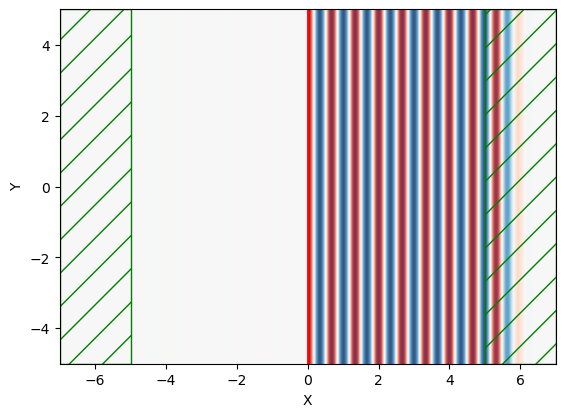

-----------
Initializing structure...
time for choose_chunkdivision = 8.29697e-05 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.524424 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.40954,0.51303,0) = 1 after 69 iters
Meep progress: 4.94/100.0 = 4.9% done in 4.0s, 77.0s to go
on time step 494 (time=4.94), 0.00810118 s/step
Meep progress: 10.73/100.0 = 10.7% done in 8.0s, 66.6s to go
on time step 1073 (time=10.73), 0.00691706 s/step
Meep progress: 17.13/100.0 = 17.1% done in 12.0s, 58.1s to go
on time step 1713 (time=17.13), 0.00625253 s/step
Meep progress: 23.51/100.0 = 23.5% done in 16.0s, 52.1s to go
on time step 2351 (time=23.51), 0.0062723 s/step
Meep progress: 29.810000000000002/100.0 = 29.8% done in 20.0s, 47.1s to go
on time step 2982 (time=29.82), 0.00634276 s/step
Meep progress: 36.11/100.0 = 36.1% done in 24.0s, 42.5s to go
on time step 3612 (time=36.12), 0.00636198 s/step
Meep progress: 42.67

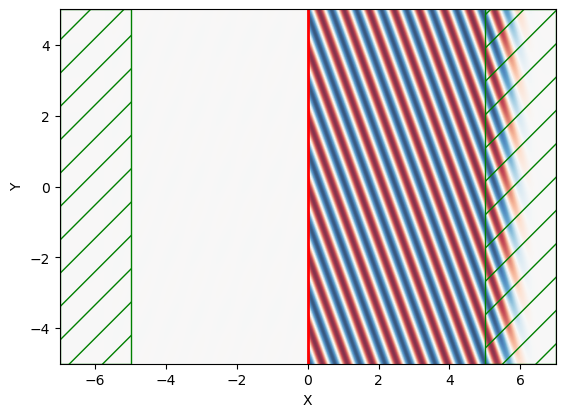

-----------
Initializing structure...
time for choose_chunkdivision = 0.000102997 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.480435 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.14907,0.964181,0) = 1 after 61 iters
Meep progress: 6.47/100.0 = 6.5% done in 4.0s, 57.9s to go
on time step 647 (time=6.47), 0.00618982 s/step
Meep progress: 12.88/100.0 = 12.9% done in 8.0s, 54.2s to go
on time step 1288 (time=12.88), 0.00624907 s/step
Meep progress: 18.73/100.0 = 18.7% done in 12.0s, 52.1s to go
on time step 1873 (time=18.73), 0.00684342 s/step
Meep progress: 25.72/100.0 = 25.7% done in 16.0s, 46.3s to go
on time step 2572 (time=25.72), 0.00572758 s/step
Meep progress: 32.22/100.0 = 32.2% done in 20.0s, 42.1s to go
on time step 3222 (time=32.22), 0.00615928 s/step
Meep progress: 39.08/100.0 = 39.1% done in 24.0s, 37.5s to go
on time step 3908 (time=39.08), 0.00583678 s/step
Meep progress: 45.97/100.0 = 46

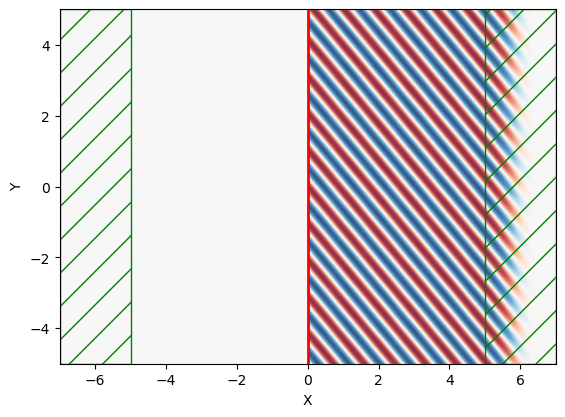

In [3]:
for rot_angle in np.radians([0, 20, 40]):
    run_sim(rot_angle)

Note that this example involves a `ContinuousSource` for the time profile. For a pulsed source, the oblique planewave is incident at a given angle for only a *single* frequency component of the source. This is a fundamental feature of FDTD simulations and not of Meep per se. Thus, to simulate an incident planewave at multiple angles for a given frequency ω, you will need to do separate simulations involving different values of $\vec{k}$ (`k_point`) since each set of ($\vec{k}$,ω) specifying the Bloch-periodic boundaries and the frequency of the source will produce a different angle of the planewave. For more details, refer to Section 4.5 ("Efficient Frequency-Angle Coverage") in [Chapter 4](https://arxiv.org/abs/1301.5366) ("Electromagnetic Wave Source Conditions") of [Advances in FDTD Computational Electrodynamics: Photonics and Nanotechnology](https://www.amazon.com/Advances-FDTD-Computational-Electrodynamics-Nanotechnology/dp/1608071707).